<a href="https://colab.research.google.com/github/D1VORY/pruning_neural_networks/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import (
    Input, 
    Dense, 
    Activation, 
    Flatten, 
    Conv2D,
    MaxPooling2D,
    Dropout,
    Lambda,
    ZeroPadding2D,
    MaxPool2D,
    BatchNormalization
)
from keras import  losses
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.applications import ResNet101V2

In [ ]:
class VGG16:
    def __init__(self, width = 224, height= 224, channels = 3):
        self.model = self.init_model(width, height, channels)

    def init_model(self, width, height, channels):
        model = Sequential()

        model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(BatchNormalization(axis=3))

        model.add(Conv2D(filters=128,kernel_size=(5,5), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=256,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=128,kernel_size=(1,1), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        model.add(Dropout(0.5))

        model.add(Conv2D(filters=512,kernel_size=(5,5), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=256,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=128,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        model.add(Dropout(0.5))

      

        model.add(Flatten())
        model.add(Dense(units=1024,activation="relu"))
        model.add(Dropout(0.2))
        model.add(Dense(units=1024,activation="relu"))
        model.add(Dense(units=256,activation="relu"))

        model.add(Dense(units=40, activation="softmax"))       

       
        return model

    def summary(self):
       # self.model.build()
        return self.model.summary()

In [ ]:
vgg = VGG16()
vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 256)     295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 256)     1

In [ ]:
x_train = np.load('/content/drive/My Drive/datasets/birds/x_train2.npy')
y_train = np.load('/content/drive/My Drive/datasets/birds/y_train2.npy')
x_test = np.load('/content/drive/My Drive/datasets/birds/x_test2.npy')
y_test = np.load('/content/drive/My Drive/datasets/birds/y_test2.npy')


print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)


x_train shape =  (5391, 224, 224, 3)
y_train shape =  (5391,)

x_test shape =  (200, 224, 224, 3)
y_test shape =  (200,)


In [ ]:
x_valid = np.load('/content/drive/My Drive/datasets/birds/x_valid2.npy')
y_valid = np.load('/content/drive/My Drive/datasets/birds/y_valid2.npy')

x_valid = x_valid / 255
x_valid, y_valid = shuffle(x_valid, y_valid) 

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
# y_test = np.reshape(y_test, (y_test.shape[0],1,1,1))
# y_train = np.reshape(y_train, (y_train.shape[0],1,1,1))

In [ ]:
x_train, y_train = shuffle(x_train, y_train) 

x_test, y_test = shuffle(x_test, y_test)


In [ ]:
vgg.model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [ ]:

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

history = vgg.model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_valid,y_valid),  callbacks=[es_callback])

85/85 [==============================] - 40s 472ms/step - loss: 0.0965 - accuracy: 0.9716 - val_loss: 0.7122 - val_accuracy: 0.8550


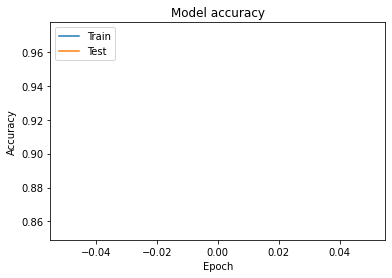

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
preds = vgg.model.evaluate(x_test, y_test)
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 0s 55ms/step - loss: 0.7088 - accuracy: 0.8800
Loss = 0.7087718844413757
Test Accuracy = 0.8799999952316284


In [ ]:
vgg.model.save('/content/drive/My Drive/datasets/birds/models/v2/birdModel.h5')

In [ ]:
vgg.model.save_weights('/content/drive/My Drive/datasets/birds/models/v2/birdModelWeights.h5')

In [ ]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(filters=128,kernel_size=(5,5), activation="relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512,kernel_size=(3,3), activation="relu"))
model.add(Dropout(0.5))

model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(5,5),padding="same", activation="relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation="relu"))

model.add(Dense(units=40, activation="softmax"))

In [ ]:
 model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(BatchNormalization(axis=3))

        model.add(Conv2D(filters=128,kernel_size=(5,5), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=256,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=128,kernel_size=(1,1), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        model.add(Dropout(0.5))

        model.add(Conv2D(filters=512,kernel_size=(5,5), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=256,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        #model.add(Dropout(0.5))

        model.add(Conv2D(filters=128,kernel_size=(3,3), activation="relu"))
        model.add(BatchNormalization(axis=3))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        model.add(Dropout(0.5))

      

        model.add(Flatten())
        model.add(Dense(units=1024,activation="relu"))
        model.add(Dropout(0.2))
        model.add(Dense(units=256,activation="relu"))

        model.add(Dense(units=40, activation="softmax"))
        84.5